# Preprocessing

## **First 6 columns**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("music_genre.csv", sep = ',')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
print(df.isnull().sum())

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [ ]:
print(df[df['valence'].isnull()])


       instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN

缺失值位於第10000至第10004列

In [ ]:
df.drop(df.index[10000:10005], inplace=True)

In [ ]:
df[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


轉換資料型態

In [ ]:
df['instance_id']

df['instance_id'] = df['instance_id'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df['popularity'] = df['popularity'] / 100
df['popularity'].describe()

count    50000.000000
mean         0.442204
std          0.155420
min          0.000000
25%          0.340000
50%          0.450000
75%          0.560000
max          0.990000
Name: popularity, dtype: float64

In [ ]:
df['acousticness'].describe()

count    50000.000000
mean         0.306383
std          0.341340
min          0.000000
25%          0.020000
50%          0.144000
75%          0.552000
max          0.996000
Name: acousticness, dtype: float64

In [ ]:
df['danceability'].describe()

count    50000.000000
mean         0.558241
std          0.178632
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64

In [ ]:
df['duration_ms'].describe()

count    5.000000e+04
mean     2.212526e+05
std      1.286720e+05
min     -1.000000e+00
25%      1.748000e+05
50%      2.192810e+05
75%      2.686122e+05
max      4.830606e+06
Name: duration_ms, dtype: float64

## **Last 6 columns**

In [ ]:
# Drop rows with NaN values in the 'mode' column
df.dropna(subset=['mode'], inplace=True)

# Convert the 'mode' column to string data type
df['mode'] = df['mode'].astype(str)

# Display the sorted value counts
df['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [ ]:
# Convert non-numeric values to NaN
df['speechiness'] = pd.to_numeric(df['speechiness'], errors='coerce')

# Remove rows containing NaN in the 'speechiness' column
df = df.dropna(subset=['speechiness'])

# Convert the column to float
df['speechiness'] = df['speechiness'].astype(float)

# Display the sorted value counts
df['speechiness'].value_counts(ascending=True).sort_index(ascending=True)

0.0223    1
0.0224    3
0.0225    1
0.0226    2
0.0227    1
         ..
0.9270    1
0.9320    1
0.9390    1
0.9410    1
0.9420    1
Name: speechiness, Length: 1337, dtype: int64

In [ ]:
# Replace '?' with NaN in the 'tempo' column
df['tempo'] = df['tempo'].replace('?', np.nan)

# Convert the 'tempo' column to float
df['tempo'] = df['tempo'].astype(float)

# Sort the DataFrame by the 'tempo' column
df.sort_values(by='tempo', inplace=True)

# Display the sorted value counts
df['tempo'].value_counts(ascending=True).sort_index(ascending=True)

34.347     1
34.469     1
34.765     1
34.856     1
35.551     1
          ..
217.927    1
218.030    1
219.331    1
220.041    1
220.276    1
Name: tempo, Length: 29393, dtype: int64

In [ ]:
# Drop rows with NaN values in the 'obtained_date' column
df.dropna(subset=['obtained_date'], inplace=True)

# Display the sorted value counts
df['obtained_date'].value_counts(ascending=True).sort_index(ascending=True)

0/4          1
1-Apr      400
3-Apr     4067
4-Apr    44748
5-Apr      784
Name: obtained_date, dtype: int64

In [ ]:
# Drop rows with NaN values in the 'valence' column
df.dropna(subset=['valence'], inplace=True)

# Convert the 'valence' column to float
df['valence'] = df['valence'].astype(float)

# Sort the DataFrame by the 'valence' column
df.sort_values(by='valence', inplace=True)

# Display the sorted value counts
df['valence'].value_counts(ascending=True).sort_index(ascending=True)

0.0000    2
0.0193    1
0.0205    1
0.0234    1
0.0241    1
         ..
0.9860    1
0.9870    1
0.9890    1
0.9900    1
0.9920    1
Name: valence, Length: 1615, dtype: int64

In [ ]:
# Drop rows with NaN values in the 'music_genre' column
df.dropna(subset=['music_genre'], inplace=True)

# Display the sorted value counts
df['music_genre'].value_counts(ascending=True).sort_index(ascending=True)

Alternative    5000
Anime          5000
Blues          5000
Classical      5000
Country        5000
Electronic     5000
Hip-Hop        5000
Jazz           5000
Rap            5000
Rock           5000
Name: music_genre, dtype: int64

## **Middle 6 columns**

In [ ]:
# import csv file
from google.colab import files

uploaded = files.upload()

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['music_genre.csv']))
print(df)

In [ ]:
# duration_ms column
df["duration_ms"].describe()

# first filter out the -1 values and then calculate mean
filtered = df[~df["duration_ms"].isin([-1])]
duration_avg = filtered["duration_ms"].mean()

# replace all -1 with mean
df["duration_ms"] = df["duration_ms"].replace(-1.0, duration_avg)

print(df["duration_ms"].mean())
print(duration_avg)

245503.54146601268
245503.54146601274


In [ ]:
# energy column
df["energy"].describe()

# looks ok

count    50000.000000
mean         0.599755
std          0.264559
min          0.000792
25%          0.433000
50%          0.643000
75%          0.815000
max          0.999000
Name: energy, dtype: float64

In [ ]:
# instrumentalness column
df["instrumentalness"].describe()

# looks ok

count    50000.000000
mean         0.181601
std          0.325409
min          0.000000
25%          0.000000
50%          0.000158
75%          0.155000
max          0.996000
Name: instrumentalness, dtype: float64

In [ ]:
# key column
# since there are a total of 12 keys => C, C#, ..., A#, B
# map them to a 0 based index: 0 -> 11
df["key"] = df["key"].astype(str)
# print(df["key"].unique())

df["key"] = df["key"].replace("C", 0)
df["key"] = df["key"].replace("C#", 1)
df["key"] = df["key"].replace("D", 2)
df["key"] = df["key"].replace("D#", 3)
df["key"] = df["key"].replace("E", 4)
df["key"] = df["key"].replace("F", 5)
df["key"] = df["key"].replace("F#", 6)
df["key"] = df["key"].replace("G", 7)
df["key"] = df["key"].replace("G#", 8)
df["key"] = df["key"].replace("A", 9)
df["key"] = df["key"].replace("A#", 10)
df["key"] = df["key"].replace("B", 11)

print(df["key"].unique())

[ 9  2  3  8  7  1  4  5  0 10 11  6]


In [ ]:
# liveness column
df["liveness"].describe()

# looks ok

count    50000.000000
mean         0.193896
std          0.161637
min          0.009670
25%          0.096900
50%          0.126000
75%          0.244000
max          1.000000
Name: liveness, dtype: float64

In [ ]:
# loudness column
df["loudness"].describe()

# scale data to a fixed range of 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[["loudness"]] = scaler.fit_transform(df[["loudness"]])

df["loudness"].describe()

count    50000.000000
mean         0.746451
std          0.121343
min          0.000000
25%          0.712463
50%          0.783018
75%          0.824434
max          1.000000
Name: loudness, dtype: float64

In [ ]:
# export to csv
df

df.to_csv('music_genre_v3.csv')

## **Outliers and Excess data**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("music_genre_v2.csv")

# df["obtained_date"].unique() # no helpful info

In [ ]:
# drop obtained_date column
df.drop("obtained_date", axis=1, inplace=True)
print(df.columns)

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')


In [ ]:
# drop unnamed: 0
df.drop("Unnamed: 0", axis=1, inplace=True)
print(df.columns)

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')


In [ ]:
df.info()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  int64  
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-null  object

In [ ]:
# tempo has null values => replace with mean
df["tempo"].describe()

# first filter out the null values and then calculate mean
filtered = df[~df["tempo"].isin([np.nan])]
tempo_avg = filtered["tempo"].mean()

# replace all null with mean
df["tempo"] = df["tempo"].replace(np.nan, tempo_avg)

print(df["tempo"].mean())
print(tempo_avg)

119.95296059529097
119.95296059529097


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the data
label_encoder.fit(df['music_genre'])

# Transform the data
df['music_genre'] = label_encoder.transform(df['music_genre'])

# same for mode
label_encoder.fit(df['mode'])
df['mode'] = label_encoder.transform(df['mode'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  int64  
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  int64  
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  valence           50000 non-null  float64
 16  music_genre       50000 non-null  int64 

# Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('music_genre_v3.csv', sep = ',')
print(df.isnull().sum())
df.head()

Unnamed: 0          0
instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


,Unnamed: 0,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,24838,Kensuke Ushio,inv(II.ii),0.25,0.952,0.3560,46267.000000,0.02540,0.838,9,0.1100,0.249813,1,0.0703,61.002,0.0000,1
1,1,41093,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 25c, Pil...",0.00,0.914,0.5880,16316.000000,0.16500,0.000,2,0.2330,0.408742,0,0.2370,104.678,0.0000,3
2,2,21571,György Ligeti,Lux aeterna,0.28,0.962,0.0663,245503.541466,0.00285,0.569,3,0.0893,0.125064,0,0.0486,75.787,0.0193,3
3,3,51096,Daft Punk,Round One,0.20,0.301,0.3890,100920.000000,0.37200,0.642,8,0.1040,0.530045,0,0.0378,108.077,0.0205,5
4,4,69626,Pauline Oliveros,Suiren,0.32,0.977,0.0631,601600.000000,0.00256,0.840,7,0.1150,0.051979,0,0.0452,65.919,0.0234,3


In [ ]:
# Multiply each column by its corresponding weight
# danceability 0.193473
# energy	0.126946
# acousticness	0.089645
# liveness	0.087660
# speechiness	0.084499
df_input = df[['danceability','energy', 'acousticness','instrumentalness','liveness']]

data = [[0.193473],[0.126946],[0.089645],[0.087660],[0.084499]]
weights = pd.DataFrame(data, columns=["w"])
sum = weights["w"].sum()

weights["w"] = weights["w"] / sum
weights

df_input['danceability'] = df_input['danceability'] * weights["w"][0]
df_input['energy'] = df_input['energy'] * weights["w"][1]
df_input['acousticness'] = df_input['acousticness'] * weights["w"][2]
df_input['instrumentalness'] = df_input['instrumentalness'] * weights["w"][3]
df_input['liveness'] = df_input['liveness'] * weights["w"][4]

# df_input[['danceability','energy', 'acousticness','instrumentalness','liveness']].multiply(weights["w"], axis="columns")
# # df_input.head(7)
df_input

# Sum up the weighted columns to create the weighted feature
weighted_feature = df_input.sum(axis=1)

#
df_clustering = pd.concat([weighted_feature, df["valence"]], axis=1)
df_clustering.rename(columns={0: 'Data*Weight'}, inplace=True)
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data*Weight  50000 non-null  float64
 1   valence      50000 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB


<ipython-input-100-1bd108cb484d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['danceability'] = df_input['danceability'] * weights["w"][0]
<ipython-input-100-1bd108cb484d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['energy'] = df_input['energy'] * weights["w"][1]
<ipython-input-100-1bd108cb484d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(df_clustering)
cluster_labels = kmeans.labels_
df_clustering['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-102-2b3663a2ea82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['cluster'] = kmeans.labels_


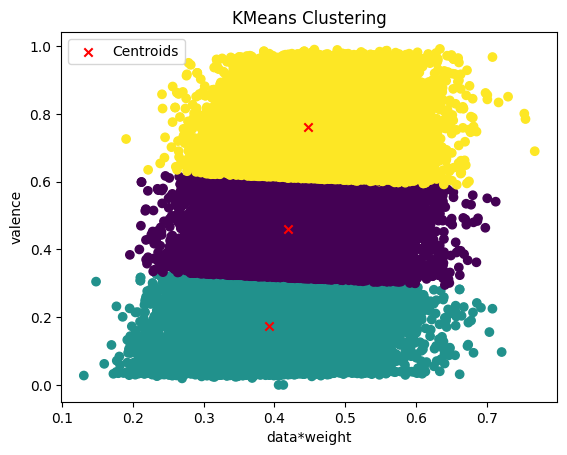

In [ ]:
import matplotlib.pyplot as plt
df_input['cluster'] = kmeans.labels_
plt.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], c=df_clustering['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('data*weight')
plt.ylabel('valence')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

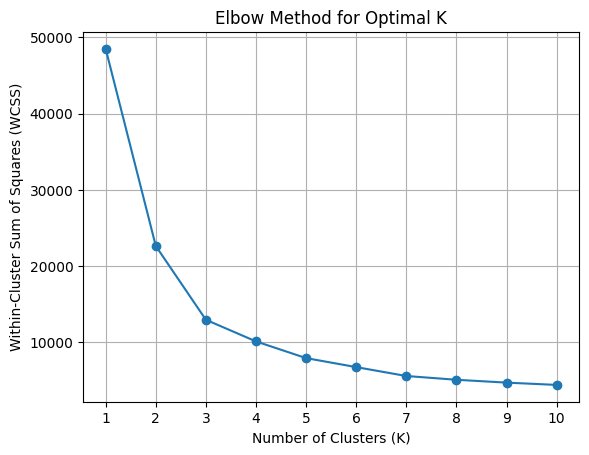

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of K values to test
k_values = range(1, 11)
wcss = []  # within-cluster sum of squares

# Calculate WCSS for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_input)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Regression


In [ ]:
df = pd.read_csv("music_genre_v3.csv", sep = ',')
dfr= df[['popularity', 'acousticness', 'danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','speechiness','valence']]
dfr.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,valence
popularity,1.000000,-0.290453,0.356420,-0.103719,0.216345,-0.364960,0.006558,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.290453,1.000000,-0.347681,0.077724,-0.791250,0.387970,-0.015952,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.356420,-0.347681,1.000000,-0.188964,0.263934,-0.301277,0.022234,-0.051465,0.390859,0.279767,0.434557
duration_ms,-0.103719,0.077724,-0.188964,1.000000,-0.085883,0.159276,-0.005513,0.026492,-0.127675,-0.102093,-0.164539
energy,0.216345,-0.791250,0.263934,-0.085883,1.000000,-0.389730,0.020036,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.364960,0.387970,-0.301277,0.159276,-0.389730,1.000000,-0.011944,-0.093537,-0.529030,-0.199137,-0.272780
key,0.006558,-0.015952,0.022234,-0.005513,0.020036,-0.011944,1.000000,0.004174,0.016835,0.012962,0.035389
liveness,-0.039468,-0.109220,-0.051465,0.026492,0.186731,-0.093537,0.004174,1.000000,0.126504,0.114475,0.052110
loudness,0.317941,-0.730401,0.390859,-0.127675,0.838399,-0.529030,0.016835,0.126504,1.000000,0.165578,0.340664
speechiness,0.224309,-0.163377,0.279767,-0.102093,0.158180,-0.199137,0.012962,0.114475,0.165578,1.000000,0.059847


<Axes: >

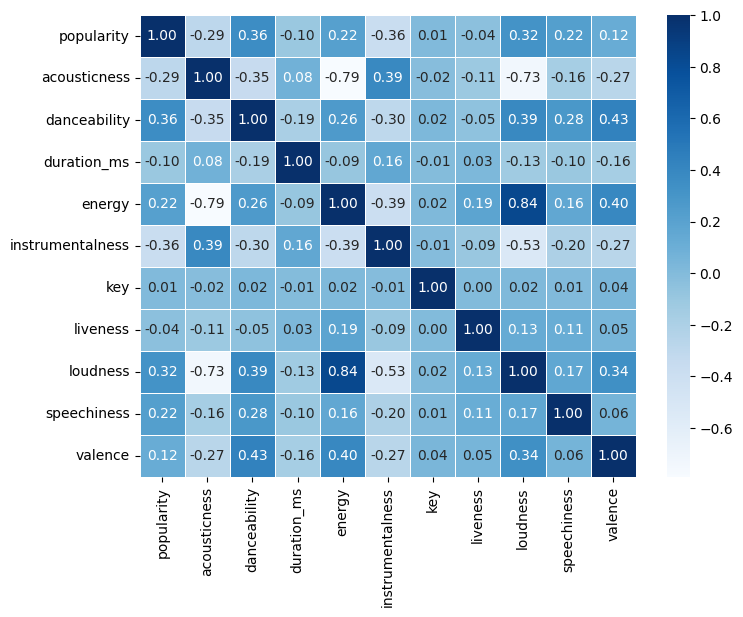

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, axx = plt.subplots(figsize=(8,6))  # Create a new figure object with a size of 8x6 inches
sns.heatmap(dfr.corr(), linewidths=0.5, cmap="Blues", annot=True, fmt=".2f", ax=axx)

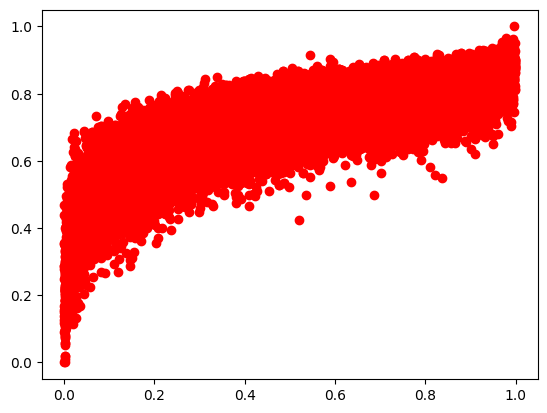

In [ ]:
plt.scatter(df["energy"], df["loudness"], color="red")
plt.title("CGPA v Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("CGPA")
plt.legend()
plt.grid(True)

# Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# df = pd.read_csv("music_genre_v3.csv")

# add feature like
df["Like"] = None

for index, row in df.iterrows():
    if row["valence"] >= 0.8:
        df.at[index, "Like"] = 1
    else:
        df.at[index, "Like"] = 0

# split into test and train data

# Shuffle the data to remove any biases
data_shuffled = df.sample(frac=1, random_state=42)

# equally distribute data with respect to column: "music_genre"
equal_distribute_col = 'music_genre'

train_data, test_data = train_test_split(df, test_size=0.1, stratify=df[equal_distribute_col], random_state=42)

# drop unused columns
train_data = train_data.drop(["Unnamed: 0", "artist_name", "track_name", "valence"], axis=1)


In [ ]:
train_data.head(-5)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,music_genre,Like
30058,30243,0.15,0.004690,0.255,199608.0,0.890,0.000045,10,0.0554,0.881059,1,0.0840,203.934000,1,0
3007,38090,0.31,0.948000,0.140,201187.0,0.142,0.052500,5,0.1280,0.624395,1,0.0480,48.658000,1,0
9459,42796,0.56,0.280000,0.713,199091.0,0.598,0.000000,11,0.0735,0.798248,0,0.3100,119.952961,6,0
48185,30690,0.32,0.207000,0.540,189800.0,0.842,0.003630,0,0.3240,0.788344,0,0.0390,160.621000,2,1
32807,55706,0.62,0.447000,0.818,199864.0,0.673,0.000000,11,0.1110,0.849774,0,0.2350,130.035000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22886,25622,0.39,0.452000,0.638,271959.0,0.338,0.078600,0,0.0898,0.718370,0,0.0288,115.593000,2,0
48160,87360,0.40,0.388000,0.612,156840.0,0.730,0.000017,0,0.3050,0.740303,1,0.0540,169.771000,4,1
41269,30714,0.40,0.000007,0.499,278133.0,0.899,0.005140,9,0.1680,0.826127,0,0.0518,138.020000,3,0
21781,61172,0.53,0.065300,0.416,205187.0,0.825,0.000000,7,0.3420,0.833570,0,0.0403,135.912000,4,0


In [ ]:
# divide dataset into training and testing

from sklearn.model_selection import train_test_split

x = train_data.drop("Like", axis=1)
y = train_data["Like"].astype(int)

# Perform stratified train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_features=6, min_samples_split=30, min_samples_leaf=4)

# Train the model
random_forest.fit(x_train, y_train)

# Make predictions
predictions = random_forest.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8995555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4030
           1       0.66      0.08      0.14       470

    accuracy                           0.90      4500
   macro avg       0.78      0.54      0.54      4500
weighted avg       0.88      0.90      0.86      4500



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV instance
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(x, y)

# Print the best parameters and the corresponding score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Retrieve the best estimator
best_rf = random_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Initialize the Random Forest classifier
best_rf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10)

# Train the model
best_rf.fit(x_train, y_train)

# Make predictions
predictions = best_rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8951111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4030
           1       0.25      0.00      0.00       470

    accuracy                           0.90      4500
   macro avg       0.57      0.50      0.47      4500
weighted avg       0.83      0.90      0.85      4500



In [ ]:
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
3,danceability,0.193473
5,energy,0.126946
2,acousticness,0.089645
8,liveness,0.087660
11,speechiness,0.084499
4,duration_ms,0.078600
9,loudness,0.077875
12,tempo,0.065523
13,music_genre,0.050271
1,popularity,0.044139


In [ ]:
test_data = df.drop(["Unnamed: 0", "artist_name", "track_name", "valence", "Like"], axis=1)
test_data

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,music_genre
0,24838,0.25,0.9520,0.3560,46267.000000,0.02540,0.838000,9,0.1100,0.249813,1,0.0703,61.002,1
1,41093,0.00,0.9140,0.5880,16316.000000,0.16500,0.000000,2,0.2330,0.408742,0,0.2370,104.678,3
2,21571,0.28,0.9620,0.0663,245503.541466,0.00285,0.569000,3,0.0893,0.125064,0,0.0486,75.787,3
3,51096,0.20,0.3010,0.3890,100920.000000,0.37200,0.642000,8,0.1040,0.530045,0,0.0378,108.077,5
4,69626,0.32,0.9770,0.0631,601600.000000,0.00256,0.840000,7,0.1150,0.051979,0,0.0452,65.919,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20566,0.17,0.0565,0.5200,245503.541466,0.92200,0.883000,1,0.2910,0.771471,0,0.0460,112.535,1
49996,28751,0.19,0.0249,0.8160,47587.000000,0.55400,0.959000,5,0.1290,0.761981,1,0.0387,137.730,1
49997,23222,0.22,0.5420,0.3210,90053.000000,0.57500,0.983000,5,0.1750,0.757925,1,0.0439,149.693,1
49998,62740,0.14,0.2990,0.4080,245503.541466,0.29200,0.992000,8,0.4260,0.646446,0,0.0359,150.495,1


In [ ]:
# Evaluate the model on the test set and generate all classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = best_rf.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)  # Renamed variable to avoid conflict

# Generate the accuracy score
accuracy = accuracy_score(y_test, y_pred)  # Renamed variable to avoid conflict

print(f"Classification Report:\n{report}\n")
print(f"Confusion Matrix:\n{matrix}\n")
print(f"Accuracy Score: {accuracy}\n")

# Make predictions on the test set (assuming test_ds is prepared correctly)
test_predictions = best_rf.predict(test_data)
# Now you can use test_predictions for further analysis or export

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      4030
           1       0.25      0.00      0.00       470

    accuracy                           0.90      4500
   macro avg       0.57      0.50      0.47      4500
weighted avg       0.83      0.90      0.85      4500


Confusion Matrix:
[[4027    3]
 [ 469    1]]

Accuracy Score: 0.8951111111111111

